# Importing datasets

In [1]:
# import product data set 
import pandas as pd
product_data = pd.read_csv('./Product Data Set - Student 2 of 3.csv', sep = '|')

In [2]:
# gives the first 5 results .tail() gives the last 5 results  [10:20] gives the 10th to 20th result etc.
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [3]:
# import transaction dataset
transaction_data = pd.read_csv('./Transaction Data Set - Student 3 of 3.csv', sep = '|')

In [18]:
transaction_data.tail()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
9995,10154,30024,14,0.0,12/31/2015,0
9996,10090,30003,7,0.1,12/31/2015,0
9997,10212,30004,7,0.0,12/31/2015,0
9998,10102,30006,8,0.2,12/31/2015,0
9999,10315,30007,10,0.0,12/31/2015,0


In [33]:
# stockout = 0 product is available, stockout = 1 product is out of stock
transaction_data['STOCKOUT'].value_counts()

0    9232
1     768
Name: STOCKOUT, dtype: int64

In [20]:
# import customer data set, was already comma separated so we don't pipe separate
customer_data = pd.read_csv('./Customer Data Set - Student 1 of 3.csv')

In [21]:
customer_data[10:20]

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
10,10011,0,18,"$20,256",6,notenrolled,NaN,2,Married
11,10012,1,44,"$101,805",2,notenrolled,NaN,2,Married
12,10013,0,40,"$88,829",5,notenrolled,NaN,1,Divorced
13,10014,0,40,"$88,833",1,notenrolled,NaN,1,Single
14,10015,0,31,"$57,251",9,enrolled,17-01-2005,1,Single
15,10016,1,39,"$86,025",3,notenrolled,NaN,2,Married
16,10017,0,40,"$89,059",8,enrolled,27-06-2009,4,Married
17,10018,0,47,"$112,035",5,enrolled,15-02-2010,2,Single
18,10019,0,69,"$137,128",7,enrolled,27-08-2009,4,Married
19,10020,1,32,"$59,964",10,notenrolled,NaN,5,Married


# Exploration


In [22]:
product_data.shape
# has 30 rows and 3 columns, since it's product data, that means there are 30 products that retailer X sells.

(30, 3)

In [23]:
transaction_data.shape
# has 10,000 rows and 6 columns, retailer X has documented 10,000 transactions

(10000, 6)

In [24]:
customer_data.shape
# has 500 rows and 9 columns, there are 500 customers' data.

(500, 9)

We can therefore conclude that this retailer has 30 products, 500 customers and has a record of 10,000 transactions

In [25]:
type(customer_data)
# Dataframe is like an excel workbook with rows and columns.

pandas.core.frame.DataFrame

In [26]:
type( customer_data.AGE)
# series -> one dimensional array

pandas.core.series.Series

In [27]:
transaction_data.dtypes


CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object

In [28]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [29]:
# remove the dollar sign
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$',''))

In [30]:
# removing the comma and changing the data type from object to int
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x.replace(',','')))

In [31]:
customer_data['INCOME'].dtypes

dtype('int64')

In [34]:
customer_data['MARITAL STATUS'].describe()
# gives statistics about the dataset. unique gives the number of different values.

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [35]:
customer_data['MARITAL STATUS'].value_counts()

Married          267
Single           180
Divorced          37
Widow/Widower     16
Name: MARITAL STATUS, dtype: int64

In [36]:
customer_data['INCOME'].describe()
# on int columns describe() returns statistical variables.

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [37]:
customer_data['ENROLLMENT DATE'].tail()

495    23-01-2014
496    01-10-2007
497    21-05-2009
498           NaN
499           NaN
Name: ENROLLMENT DATE, dtype: object

In [68]:
'''
we run this code specifically on .notnull() because we cannot convert to date, missing/null values.
using strptime we convert string to time(string parse time), this command can be run once at a time, once you've 
converted the way to reconvert to string is to use strftime (string format time). You can check whether the dtypes changes.
'''
from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, "%d-%m-%Y") )

In [39]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

## Data Quality
**checking the quality of data by cleaning and correcting where needed**

In [43]:
# checking for null values: .isnull() only shows all values, .values puts all in an array, .any() summarises.
print("product_data null values? ", product_data.isnull().values.any())
print('transaction_data null values? ', transaction_data.isnull().values.any())
print('customer_data null values? ', customer_data.isnull().values.any())

product_data null values?  False
transaction_data null values?  False
customer_data null values?  True


In [45]:
# where are these missing values in customer data?
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

So enrollment date is the only field with null values. We already know that that is due to some customers not being enrolled and therefore have no enrollment date.

### Analysing the data using graphs

In [103]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency distribution')

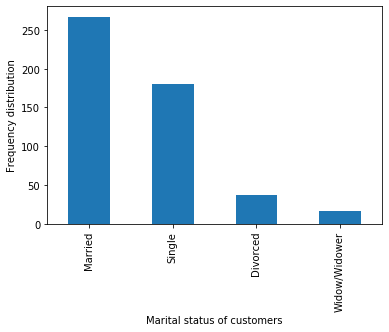

In [47]:
# we start with univariate analysis i.e. analysing a single variable in our case, marital status
customer_data['MARITAL STATUS'].value_counts().plot(kind = 'bar')
plt.xlabel("Marital status of customers")
plt.ylabel("Frequency distribution")

most of retailer's X customers are married and hence may play a big role in what they purchase.

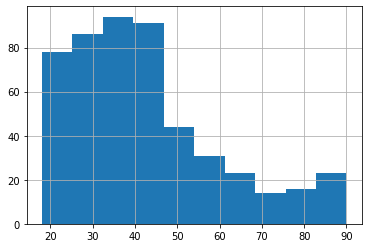

In [39]:
# exploring customers' ages. We use histogram because age is a continuous variable
customer_data['AGE'].hist(bins=10)

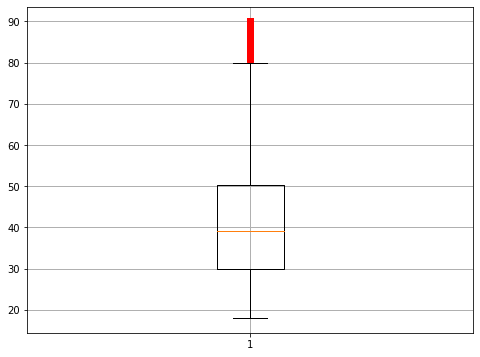

In [49]:
# another option is to draw a box plot to show how the variables are dispersed. boxplot is like a boxy rep of a normal curve. It has Q1 Q2(red line) and Q3.
# read more on boxplots https://matplotlib.org/3.2.2/gallery/statistics/boxplot_demo.html
plt.figure(figsize=(8,6))
plt.boxplot(customer_data.AGE,0,'rs',1) #draws a vertical boxplot
plt.grid(linestyle = '-', linewidth = 1)

In [145]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

## Creating a customer view

**There were two important objectives that were set during the business understanding phase:**
    1. understanding the factors associated with the loyalty participation.
        compare variables to loyalty participation like age and marital status etc.
    2. understanding the factors associated with increased spending.
        compare variables like age, income etc to total spent.

In [147]:
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [172]:
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [41]:
# We must join transaction data and product data because we need to know which transaction bought which product.
# merging product num to product code because they are similar, it's what we're using to join it's like primary key.
transaction_products = transaction_data.merge(product_data, how = 'inner', left_on= 'PRODUCT NUM', right_on= 'PRODUCT CODE')
transaction_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [42]:
transaction_products['UNIT LIST PRICE'] = transaction_products['UNIT LIST PRICE'].map(lambda x: float(x.replace('$', '')))

In [43]:
transaction_products.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [44]:
# creating a new attribute from the given data i.e. deriving from data
transaction_products['TOTAL PRICE'] = transaction_products['QUANTITY PURCHASED']*transaction_products['UNIT LIST PRICE']*(1-transaction_products['DISCOUNT TAKEN'])

In [45]:
transaction_products[10:20]

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
10,10220,30011,3,0.0,1/4/2015,0,30011,APPAREL,25.46,76.380
11,10016,30011,10,0.0,1/4/2015,0,30011,APPAREL,25.46,254.600
12,10409,30011,10,0.0,1/4/2015,0,30011,APPAREL,25.46,254.600
13,10105,30011,11,0.2,1/4/2015,0,30011,APPAREL,25.46,224.048
14,10192,30011,11,0.0,1/7/2015,0,30011,APPAREL,25.46,280.060
15,10421,30011,3,0.0,1/9/2015,0,30011,APPAREL,25.46,76.380
16,10129,30011,4,0.0,1/9/2015,0,30011,APPAREL,25.46,101.840
17,10120,30011,6,0.0,1/9/2015,0,30011,APPAREL,25.46,152.760
18,10279,30011,7,0.0,1/9/2015,0,30011,APPAREL,25.46,178.220
19,10480,30011,6,0.2,1/9/2015,0,30011,APPAREL,25.46,122.208


In [48]:
# Let's find out income of retailer X with regards to products
income_by_product = transaction_products.groupby('PRODUCT CATEGORY').agg({'TOTAL PRICE': 'sum'}).sort_values('TOTAL PRICE', ascending = False)

In [49]:
income_by_product

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [50]:
revenue_by_product = income_by_product.rename(columns = {'TOTAL PRICE':'REVENUE PER CATEGORY'})

In [53]:
revenue_by_product

,REVENUE PER CATEGORY
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


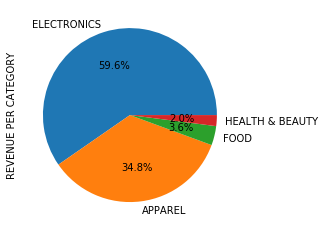

In [56]:
#REVENUE PER CATEGORY = title of pie chart; autopct = include percentage to 1 decimal point; legend = True includes key  
revenue_by_product['REVENUE PER CATEGORY'].plot(kind = 'pie', autopct = '%1.1f%%', legend = False)

In [57]:
customer_data.shape

(500, 9)

For each of our 500 customers, we will calculate **total expenditure**, **total expenditure per category** and **recent transaction date**.

In [58]:
transaction_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [59]:
'''
identify customers using their numbers then group their puchases according to product category
and find how much they spend under the category they've spent at.
'''
customer_prod_category = transaction_products.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({'TOTAL PRICE': 'sum'})

In [60]:
customer_prod_category[10:20]

TOTAL PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10004        APPAREL              3637.213
             ELECTRONICS          1840.211
             FOOD                   45.270
10005        APPAREL               213.512
10006        APPAREL              1448.330
             ELECTRONICS          2785.763
             FOOD                  720.379
             HEALTH & BEAUTY       280.375
10007        APPAREL              1252.726
             ELECTRONICS          3918.466

In [61]:
customer_prod_category.columns

Index(['TOTAL PRICE'], dtype='object')


You will notice that the only column that appears is the total price column. the customer num and product category
will not be listed. This occurs because when you group by some columns, they change from a column to a multi- or
a hierarchical index. To revert them use the reset_index() method.


In [62]:
customer_prod_category.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [63]:
# since the above table is more organized we will make it permanent
customer_prod_category = customer_prod_category.reset_index()

In [64]:
customer_prod_category[100:110]

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
100,10036,ELECTRONICS,1203.830
101,10036,FOOD,124.150
102,10037,APPAREL,1138.480
103,10037,ELECTRONICS,4021.670
104,10037,FOOD,50.880
105,10038,APPAREL,4587.505
106,10038,ELECTRONICS,4990.402
107,10038,FOOD,300.710
108,10039,APPAREL,3450.605
109,10039,ELECTRONICS,8035.044


In [65]:
# For a better view we should reorganize. And for this we'll use pivot.
customer_pivot = customer_prod_category.pivot(index = 'CUSTOMER NUM', columns = 'PRODUCT CATEGORY', values = 'TOTAL PRICE')

In [66]:
customer_pivot[200:210]

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10201,1646.750,3268.580,116.560,NaN
10202,1313.818,3461.409,135.810,NaN
10203,439.650,6291.060,633.210,NaN
10204,1439.691,5450.996,466.258,78.720
10205,3143.050,3747.260,181.660,NaN
10206,892.812,NaN,NaN,612.022
10207,1522.670,2390.870,105.630,NaN
10208,756.040,9794.260,340.423,85.280
10209,892.610,4074.472,360.880,122.740


In [69]:
transaction_products['TRANSACTION DATE'] = transaction_products['TRANSACTION DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [70]:
transaction_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,2015-01-02,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,2015-01-02,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,2015-01-02,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,2015-01-02,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,2015-01-02,0,30011,APPAREL,25.46,274.968


In [71]:
# calculate the last transaction date and total spend for each customer
recent_trans_total_spend = transaction_products.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE': 'max', 'TOTAL PRICE':'sum'}).\
rename(columns={'TRANSACTION DATE': 'RECENT TRANSACTION DATE', 'TOTAL PRICE': 'TOTAL SPENT'})
recent_trans_total_spend.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [72]:
customer_KPIs = customer_pivot.merge(recent_trans_total_spend, how = 'inner', left_index = True, right_index = True)

In [73]:
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [74]:
# replacing NaN values with 0
customer_KPIs = customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [75]:
# join customer_KPIs with the original table for customer_data
customer_all_view = customer_data.merge(customer_KPIs, how = 'inner', left_on = 'CUSTOMERID', right_index = True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


### Bivariate analysis
**Loyalty as a target variable**

In [76]:
'''
Here we want to analyze relationships between variables that affect loyalty. For example say we find a relationship
between age and loyalty, then age becomes a strong predictor of customers enrolling into a loyalty program.
We will use a pandas tool called crosstab which computes cross tabulation which we use to compare relationships 
in tabular forms. We start by cross tabulating loyalty with gender.
'''
loyalty_table = pd.crosstab(customer_all_view['GENDER'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


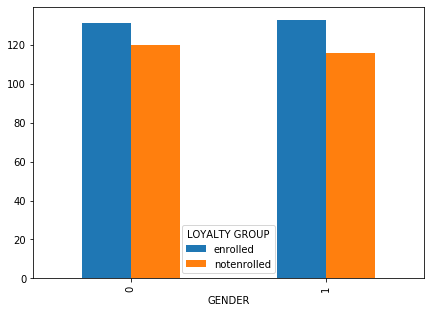

In [77]:
loyalty_table.plot(kind = 'bar', figsize = (7,5))

Gender doesn't seem to influence loyalty at all. 

In [78]:
# cross tab experience and loyalty
loyalty_table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


Those with a better experience are more likely to enroll though the margin is not as big.

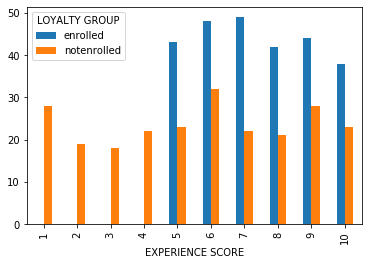

In [79]:
loyalty_table.plot(kind = 'bar')

In [80]:
# marital status and loyalty
loyalty_table = pd.crosstab(customer_all_view['MARITAL STATUS'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
MARITAL STATUS,,
Divorced,15,22
Married,144,123
Single,96,84
Widow/Widower,9,7


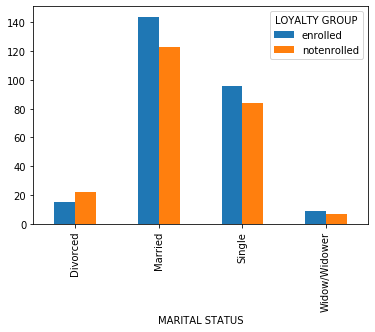

In [81]:
loyalty_table.plot(kind = 'bar')

marital status does not seem to have much effect on loyalty.

In [82]:
# age and loyalty.
# age is a continuous varible so we'll use pandas cut to bin 'age' and create a new variable 'AGE BINNED'
customer_all_view['AGE BINNED'] = pd.cut(customer_all_view['AGE'],10) #to 10 bins

In [83]:
customer_all_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

In [84]:
# now we compare age to loyalty
loyalty_table = pd.crosstab(customer_all_view['AGE BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
AGE BINNED,,
"(17.928, 25.2]",52,26
"(25.2, 32.4]",30,56
"(32.4, 39.6]",30,64
"(39.6, 46.8]",43,48
"(46.8, 54.0]",40,11
"(54.0, 61.2]",19,5
"(61.2, 68.4]",15,8
"(68.4, 75.6]",9,5
"(75.6, 82.8]",11,5


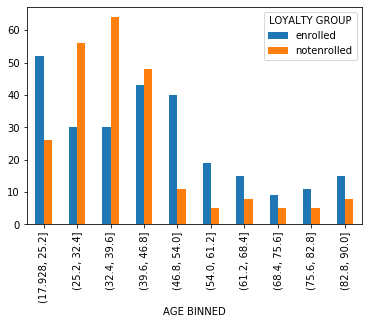

In [85]:
loyalty_table.plot(kind = 'bar')

age does seem to have an effect, very young people(17.9 - 25.2) and people from 46.8 - 90.0 care to enroll rather than not. On the other hand people within ages 25.2 - 46.8 don't care about enrolling as much.

In [86]:
# we explore this relationship further by getting the average age of people enrolled vs not enrolled
customer_all_view.groupby('LOYALTY GROUP').agg({'AGE': 'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


people enrolled are slightly older than those who haven't enrolled

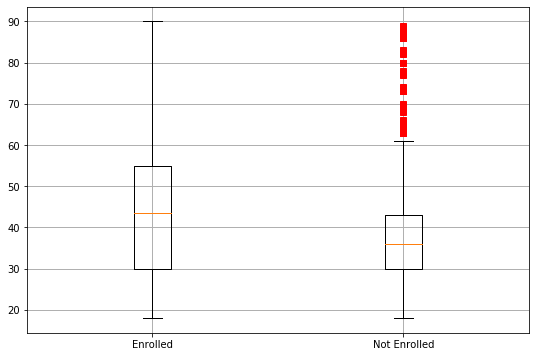

In [341]:
# plotting average enrolled and average not enrolled
fig = plt.figure(1, figsize = (9,6))
ax = fig.add_subplot(111)
plot1 = customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == 'enrolled']
plot2 = customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == 'notenrolled']
list1 = [plot1, plot2]
ax.boxplot(list1, 0, 'rs', 1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid(linestyle = '-', linewidth = 1)

Enrolled customers have a higher median and quartiles and a bigger IQR than their 'not enrolled' counterparts.
The chart shows that 75% of customers that are enrolled are below the age of 55 and 75% of customers that are not enrolled are below the age of 43.

In [87]:
# total spend vs loyalty
# total spend is also a continuous variable so we'll use bins
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'], 10)

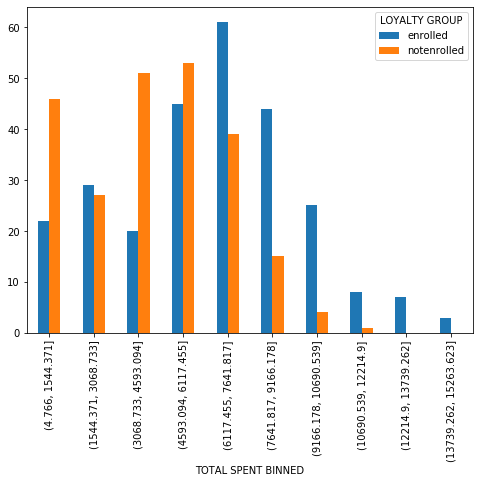

In [88]:
loyalty_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar', figsize = (8,6))

As total spending increases so do the customers' chances of enrolling.

In [93]:
loyalty_table = pd.crosstab(customer_all_view['HOUSEHOLD SIZE'], customer_all_view['LOYALTY GROUP'])
loyalty_table['Difference'] = loyalty_table['enrolled']-loyalty_table['notenrolled']
loyalty_table

LOYALTY GROUP,enrolled,notenrolled,Difference
HOUSEHOLD SIZE,,,
1,60,61,-1
2,64,49,15
3,59,45,14
4,38,34,4
5,18,22,-4
6,25,25,0


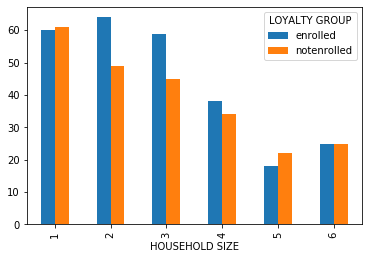

In [89]:
# loyalty vs household size
loyalty_table.plot(kind = 'bar')

There's little to no relationship between household size and loyalty although if you were to use it as an indicator, target those with a household size of 2 or 3.

**From the above analysis we have determined what affects loyalty, now we check what affects customer spending**

## Bivariate analysis
**Customer spend as a target variable**

Text(0, 0.5, 'Total spent')

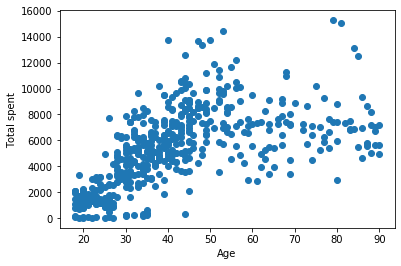

In [351]:
# we start with age. Age and total spent are both continuous so we'll use a scatterplot
plt.scatter(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total spent")

There is somewhat a positve correlation between age and total expenditure. This correlation can be quantified using **Pearson's correlation coefficient.** This is a statistical measure that measures the strength of the correlation. Its values range from -1.0 to 1.0; -1.0 shows a perfectly negative correlation, 0.0 shows no correlation and 1.0 shows a perfect positive correlation. We will use **pearsonr** library.

In [96]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])

(0.5760170677259264, 1.560821750278272e-45)

correlation is at 0.576 which implies a moderately strong correlation between the two factors

Text(0, 0.5, 'Total Spent')

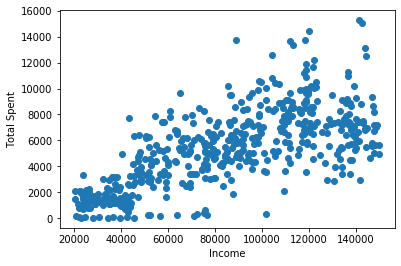

In [355]:
# income vs total spent
# income is also continuous hence scatterplot
plt.scatter(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])
plt.xlabel('Income')
plt.ylabel('Total Spent')

In [356]:
pearsonr(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.3226326963807324e-71)

0.688 indicates a pretty strong relationship between income and expenditure which makes sense anyway, people earning more will end up spending more.

In [100]:
# customer spending vs experience in the shop.
loyalty_table = customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT': 'mean'}).reset_index()
loyalty_table

,EXPERIENCE SCORE,TOTAL SPENT
0,1,3911.019036
1,2,4410.997842
2,3,3395.602222
3,4,4257.461455
4,5,6097.330864
5,6,5398.145675
6,7,5816.187268
7,8,5804.105016
8,9,5771.192042
9,10,5217.369574


([<matplotlib.axis.XTick at 0x7f6feb082ad0>,
 <a list of 10 Text xticklabel objects>)

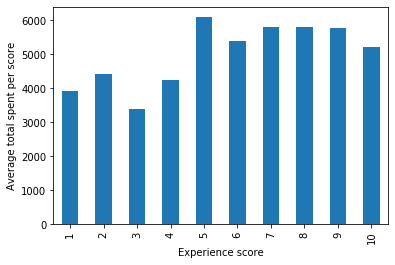

In [104]:
loyalty_table['TOTAL SPENT'].plot(kind = 'bar')
plt.xlabel("Experience score")
plt.ylabel("Average total spent per score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])

customers with experiences of 5 and above spend more at the shop

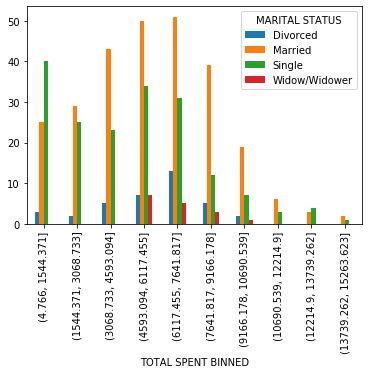

In [113]:
loyalty_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['MARITAL STATUS'])
loyalty_table.plot(kind = 'bar')

From this I can deduce that married and single people spend the most whereas divorced and widowed people spend the least.

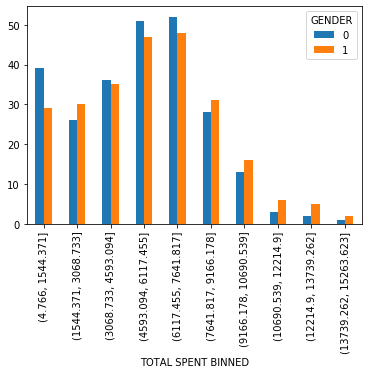

In [117]:
loyalty_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['GENDER'])
loyalty_table.plot(kind = 'bar')

In [139]:
loyalty_table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'], customer_all_view['TOTAL SPENT BINNED'])
expenditure = customer_all_view.groupby('EXPERIENCE SCORE').agg({'TOTAL SPENT':'sum'})

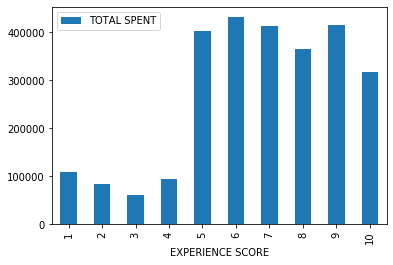

In [140]:
expenditure.plot(kind = 'bar')

better experience better spending.

In [141]:
expenditure = customer_all_view.groupby('HOUSEHOLD SIZE').agg({'TOTAL SPENT':'sum'})

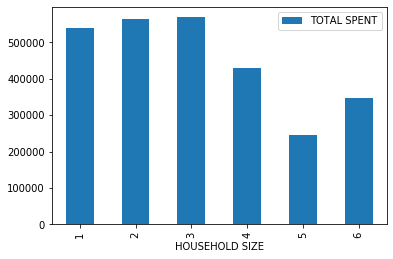

In [142]:
expenditure.plot(kind = 'bar')

no big relationship but those with 4 people or more tend to spend less than those with 3 people or less.